In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
orginalData = sns.load_dataset('penguins')
orginalData

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [3]:
data = orginalData.copy()
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
data.ndim

2

In [5]:
data.shape

(344, 7)

In [6]:
data.duplicated().sum()

0

In [7]:
data.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [9]:
data[data['bill_depth_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [10]:
data.groupby(['species', 'island']).mean(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'])

bill_length_mm  bill_depth_mm  flipper_length_mm  \
species   island                                                        
Adelie    Biscoe          38.975000      18.370455         188.795455   
          Dream           38.501786      18.251786         189.732143   
          Torgersen       38.950980      18.429412         191.196078   
Chinstrap Dream           48.833824      18.420588         195.823529   
Gentoo    Biscoe          47.504878      14.982114         217.186992   

                     body_mass_g  
species   island                  
Adelie    Biscoe     3709.659091  
          Dream      3688.392857  
          Torgersen  3706.372549  
Chinstrap Dream      3733.088235  
Gentoo    Biscoe     5076.016260

In [11]:
numericalFeature = [col for col in data.columns if data[col].dtype != 'O']
numericalFeature

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

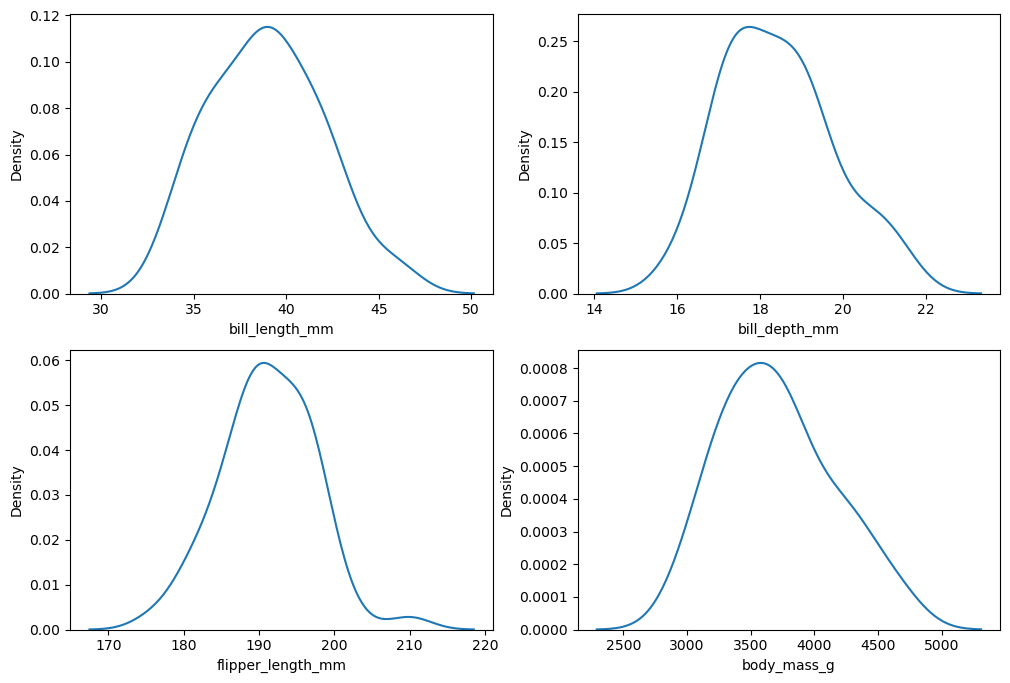

In [12]:
fig, axs = plt.subplots(2,2, figsize=(12,8))

sns.kdeplot(data[(data['species']=='Adelie') & (data['island']=='Torgersen')]['bill_length_mm'],ax=axs[0,0])
sns.kdeplot(data[(data['species']=='Adelie') & (data['island']=='Torgersen')]['bill_depth_mm'],ax=axs[0,1])
sns.kdeplot(data[(data['species']=='Adelie') & (data['island']=='Torgersen')]['flipper_length_mm'],ax=axs[1,0])
sns.kdeplot(data[(data['species']=='Adelie') & (data['island']=='Torgersen')]['body_mass_g'],ax=axs[1,1])

plt.show()

In [13]:
data[(data['species']=='Adelie') & (data['island']=='Torgersen')].describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,51.000000,51.000000,51.000000,51.000000
mean,38.950980,18.429412,191.196078,3706.372549
std,3.025318,1.339447,6.232238,445.107940
min,33.500000,15.900000,176.000000,2900.000000
25%,36.650000,17.350000,187.000000,3337.500000
50%,38.900000,18.400000,191.000000,3700.000000
75%,41.100000,19.250000,195.000000,4000.000000
max,46.000000,21.500000,210.000000,4700.000000


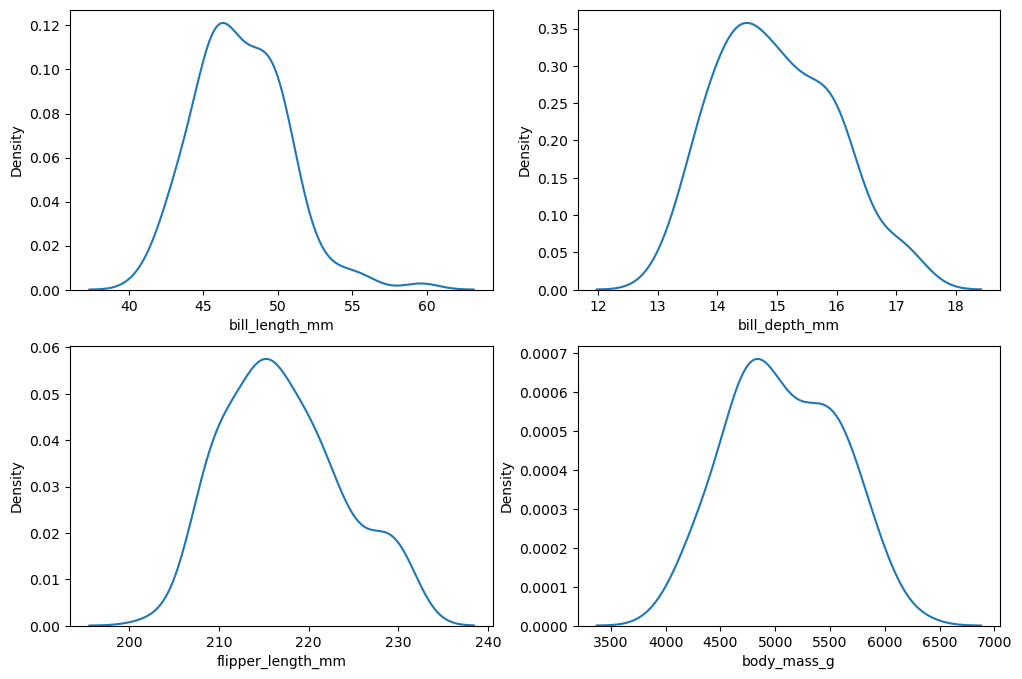

In [14]:
fig, axs = plt.subplots(2,2, figsize=(12,8))

sns.kdeplot(data[(data['species']=='Gentoo') & (data['island']=='Biscoe')]['bill_length_mm'],ax=axs[0,0])
sns.kdeplot(data[(data['species']=='Gentoo') & (data['island']=='Biscoe')]['bill_depth_mm'],ax=axs[0,1])
sns.kdeplot(data[(data['species']=='Gentoo') & (data['island']=='Biscoe')]['flipper_length_mm'],ax=axs[1,0])
sns.kdeplot(data[(data['species']=='Gentoo') & (data['island']=='Biscoe')]['body_mass_g'],ax=axs[1,1])

plt.show()

In [15]:
data[(data['species']=='Gentoo') & (data['island']=='Biscoe')].describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,123.000000,123.000000,123.000000,123.000000
mean,47.504878,14.982114,217.186992,5076.016260
std,3.081857,0.981220,6.484976,504.116237
min,40.900000,13.100000,203.000000,3950.000000
25%,45.300000,14.200000,212.000000,4700.000000
50%,47.300000,15.000000,216.000000,5000.000000
75%,49.550000,15.700000,221.000000,5500.000000
max,59.600000,17.300000,231.000000,6300.000000


In [16]:
for col in numericalFeature:
    data.fillna({col:data[col].mean()}, inplace=True)

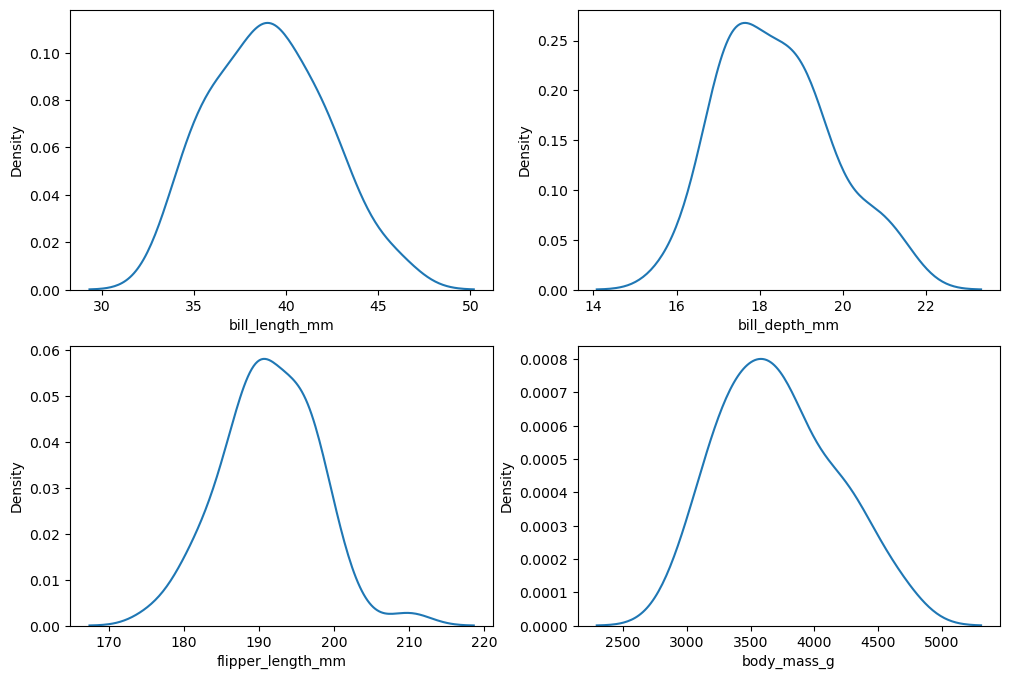

In [17]:
fig, axs = plt.subplots(2,2, figsize=(12,8))

sns.kdeplot(data[(data['species']=='Adelie') & (data['island']=='Torgersen')]['bill_length_mm'],ax=axs[0,0])
sns.kdeplot(data[(data['species']=='Adelie') & (data['island']=='Torgersen')]['bill_depth_mm'],ax=axs[0,1])
sns.kdeplot(data[(data['species']=='Adelie') & (data['island']=='Torgersen')]['flipper_length_mm'],ax=axs[1,0])
sns.kdeplot(data[(data['species']=='Adelie') & (data['island']=='Torgersen')]['body_mass_g'],ax=axs[1,1])

plt.show()

In [18]:
data[(data['species']=='Adelie') & (data['island']=='Torgersen')].describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,52.000000,52.000000,52.000000,52.000000
mean,39.046576,18.404830,191.382985,3715.899123
std,3.073806,1.338043,6.316310,446.044441
min,33.500000,15.900000,176.000000,2900.000000
25%,36.675000,17.275000,187.000000,3343.750000
50%,38.950000,18.350000,191.000000,3700.000000
75%,41.175000,19.225000,195.250000,4000.000000
max,46.000000,21.500000,210.000000,4700.000000


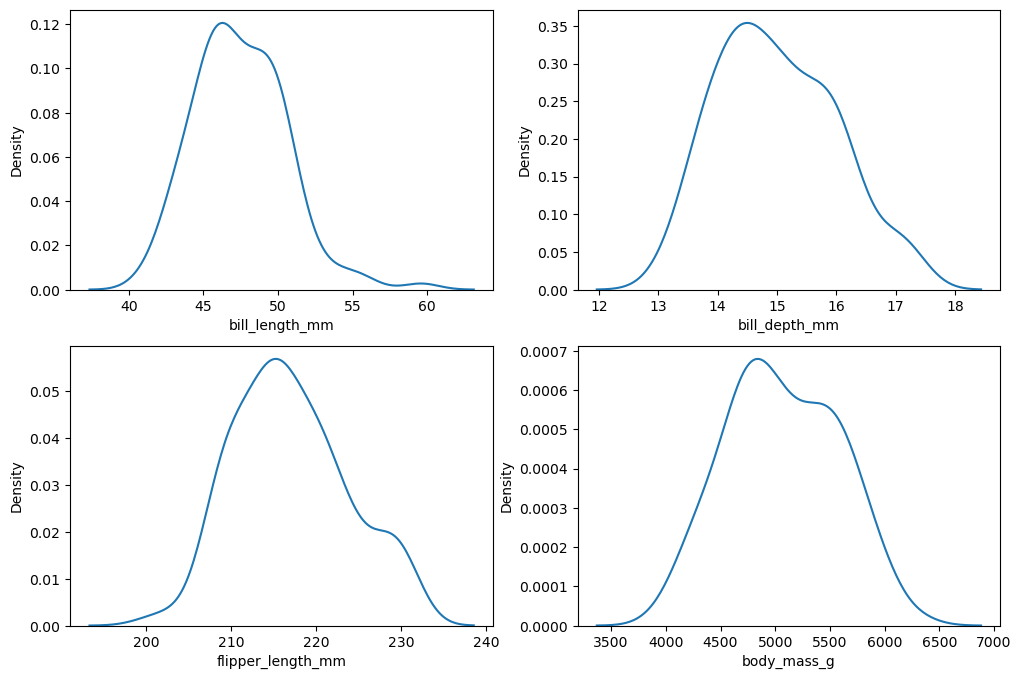

In [19]:
fig, axs = plt.subplots(2,2, figsize=(12,8))

sns.kdeplot(data[(data['species']=='Gentoo') & (data['island']=='Biscoe')]['bill_length_mm'],ax=axs[0,0])
sns.kdeplot(data[(data['species']=='Gentoo') & (data['island']=='Biscoe')]['bill_depth_mm'],ax=axs[0,1])
sns.kdeplot(data[(data['species']=='Gentoo') & (data['island']=='Biscoe')]['flipper_length_mm'],ax=axs[1,0])
sns.kdeplot(data[(data['species']=='Gentoo') & (data['island']=='Biscoe')]['body_mass_g'],ax=axs[1,1])

plt.show()

In [20]:
data[(data['species']=='Gentoo') & (data['island']=='Biscoe')].describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,124.000000,124.000000,124.000000,124.000000
mean,47.475983,14.999606,217.055768,5068.965761
std,3.086123,0.996447,6.621801,508.164382
min,40.900000,13.100000,200.915205,3950.000000
25%,45.275000,14.200000,212.000000,4700.000000
50%,47.250000,15.000000,216.000000,5000.000000
75%,49.525000,15.725000,221.000000,5500.000000
max,59.600000,17.300000,231.000000,6300.000000


In [21]:
unseenData = data[data['sex'].isnull()]
unseenData

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
8,Adelie,Torgersen,34.10000,18.10000,193.000000,3475.000000,NaN
9,Adelie,Torgersen,42.00000,20.20000,190.000000,4250.000000,NaN
10,Adelie,Torgersen,37.80000,17.10000,186.000000,3300.000000,NaN
11,Adelie,Torgersen,37.80000,17.30000,180.000000,3700.000000,NaN
47,Adelie,Dream,37.50000,18.90000,179.000000,2975.000000,NaN
246,Gentoo,Biscoe,44.50000,14.30000,216.000000,4100.000000,NaN
286,Gentoo,Biscoe,46.20000,14.40000,214.000000,4650.000000,NaN
324,Gentoo,Biscoe,47.30000,13.80000,216.000000,4725.000000,NaN
336,Gentoo,Biscoe,44.50000,15.70000,217.000000,4875.000000,NaN


In [22]:
unseenData.shape

(11, 7)

In [23]:
data = data[~(data['sex'].isnull())]
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [24]:
orginalData.shape ,data.shape

((344, 7), (333, 7))

In [25]:
standardScaler = StandardScaler()

In [26]:
for col in numericalFeature:
    data.loc[:,col] = standardScaler.fit_transform(data[[col]])

In [27]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,-0.896042,0.780732,-1.426752,-0.568475,Male
1,Adelie,Torgersen,-0.822788,0.119584,-1.069474,-0.506286,Female
2,Adelie,Torgersen,-0.676280,0.424729,-0.426373,-1.190361,Female
4,Adelie,Torgersen,-1.335566,1.085877,-0.569284,-0.941606,Female
5,Adelie,Torgersen,-0.859415,1.747026,-0.783651,-0.692852,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,0.587352,-1.762145,0.931283,0.892957,Female
340,Gentoo,Biscoe,0.514098,-1.457000,1.002739,0.799674,Female
341,Gentoo,Biscoe,1.173384,-0.744994,1.502928,1.919069,Male
342,Gentoo,Biscoe,0.221082,-1.202712,0.788372,1.234995,Female


In [28]:
ordinalEncoder = OrdinalEncoder()

In [29]:
data.loc[:, 'species'] = ordinalEncoder.fit_transform(data[['species']])
data.loc[:, 'island'] = ordinalEncoder.fit_transform(data[['island']])

In [30]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,2.0,-0.896042,0.780732,-1.426752,-0.568475,Male
1,0.0,2.0,-0.822788,0.119584,-1.069474,-0.506286,Female
2,0.0,2.0,-0.676280,0.424729,-0.426373,-1.190361,Female
4,0.0,2.0,-1.335566,1.085877,-0.569284,-0.941606,Female
5,0.0,2.0,-0.859415,1.747026,-0.783651,-0.692852,Male
...,...,...,...,...,...,...,...
338,2.0,0.0,0.587352,-1.762145,0.931283,0.892957,Female
340,2.0,0.0,0.514098,-1.457000,1.002739,0.799674,Female
341,2.0,0.0,1.173384,-0.744994,1.502928,1.919069,Male
342,2.0,0.0,0.221082,-1.202712,0.788372,1.234995,Female


In [31]:
labelEncoder = LabelEncoder()

In [32]:
data.loc[:, 'sex'] = labelEncoder.fit_transform(data['sex'])

In [33]:
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0.0,2.0,-0.896042,0.780732,-1.426752,-0.568475,1
1,0.0,2.0,-0.822788,0.119584,-1.069474,-0.506286,0
2,0.0,2.0,-0.676280,0.424729,-0.426373,-1.190361,0
4,0.0,2.0,-1.335566,1.085877,-0.569284,-0.941606,0
5,0.0,2.0,-0.859415,1.747026,-0.783651,-0.692852,1
...,...,...,...,...,...,...,...
338,2.0,0.0,0.587352,-1.762145,0.931283,0.892957,0
340,2.0,0.0,0.514098,-1.457000,1.002739,0.799674,0
341,2.0,0.0,1.173384,-0.744994,1.502928,1.919069,1
342,2.0,0.0,0.221082,-1.202712,0.788372,1.234995,0


In [34]:
X = data.drop(columns='sex')
y = data.sex
y = y.astype('int')

In [35]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((266, 6), (67, 6), (266,), (67,))

In [37]:
supportVectorClassifier = LinearSVC(dual=True)

In [38]:
supportVectorClassifier.fit(xtrain, ytrain)

LinearSVC(dual=True)

In [39]:
yprediction = supportVectorClassifier.predict(xtest)

In [40]:
confusion_matrix(ytest, yprediction)

array([[33,  4],
       [ 3, 27]], dtype=int64)

In [41]:
accuracy_score(ytest, yprediction)

0.8955223880597015

In [42]:
print(classification_report(ytest, yprediction))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        37
           1       0.87      0.90      0.89        30

    accuracy                           0.90        67
   macro avg       0.89      0.90      0.89        67
weighted avg       0.90      0.90      0.90        67



In [43]:
unseenData

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,NaN
8,Adelie,Torgersen,34.10000,18.10000,193.000000,3475.000000,NaN
9,Adelie,Torgersen,42.00000,20.20000,190.000000,4250.000000,NaN
10,Adelie,Torgersen,37.80000,17.10000,186.000000,3300.000000,NaN
11,Adelie,Torgersen,37.80000,17.30000,180.000000,3700.000000,NaN
47,Adelie,Dream,37.50000,18.90000,179.000000,2975.000000,NaN
246,Gentoo,Biscoe,44.50000,14.30000,216.000000,4100.000000,NaN
286,Gentoo,Biscoe,46.20000,14.40000,214.000000,4650.000000,NaN
324,Gentoo,Biscoe,47.30000,13.80000,216.000000,4725.000000,NaN
336,Gentoo,Biscoe,44.50000,15.70000,217.000000,4875.000000,NaN


In [44]:
for col in numericalFeature:
    unseenData.loc[:,col] = standardScaler.fit_transform(unseenData[[col]])

In [45]:
unseenData.loc[:, 'species'] = ordinalEncoder.fit_transform(unseenData[['species']])
unseenData.loc[:, 'island'] = ordinalEncoder.fit_transform(unseenData[['island']])

In [46]:
unseenData = unseenData.drop(columns='sex')

In [47]:
prediction = supportVectorClassifier.predict(unseenData)
prediction

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1])